# Class Handout: Interpretting Table 2 and Discussion

In table 2 of the class handout we have data from a paper that reports the rates of Hydrolysis of nitrosamines. the data from from a textbook. the literature source was not available.

Physical Organic Chemistry, 2nd ed. by Neil Isaacs. **1995**, *Wiley, New York*

B.A. Porai-Koshits, E.Y. Belyaev, E. Shadovskii, *Reacts. Sposobnost. Org. Soedin.*, **1964**, *1*, 10.

The code below will take the data set and LFER parameters available via github and create a dataframe with the Hammett plot data.

All of the code below was copied from the notebook for Benzyl Tosylates and used with almost no modifications.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sigmatype = "sigma"    # change to "sigma", "s_plus", or "s_minus"
local = False

if local == True:
    github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_16/data/"

    github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"
    github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
else:
    github_location = "/Users/blink/GitHub/4410PythonNotebooks/Class_16/data/"
    
    github_location_LFER_tables = "/Users/blink/GitHub/LFER-QSAR/data/"
    github_location_styles = "/Users/blink/GitHub/LFER-QSAR/styles/"




###################################################################
### a function to fill in sigma for empty spaces in s+ and s-   ###
###################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)


################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

#LFER_file = "LFER_HanschLeoTaft.csv"
LFER_file = "LFER_Williams.csv"

data_set = pd.read_csv(github_location_LFER_tables + LFER_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 


########################################################
### Fill across sigma values and select substituents ###
########################################################

data_set=fill_sigma(data_set)

### Remove unneeded columns
if LFER_file == "LFER_HanschLeoTaft.csv":
    data_set.drop(labels = ["TABLE V", "TABLE I"],      #Trim "LFER_HanschLeoTaft.csv" data
    axis = 1,
    inplace = True)
elif LFER_file == "LFER_Williams.csv":
    data_set.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
    axis = 1,
    inplace = True)
else:
    print("ERROR: No filename")


################################################################################
### Read table 1 data. The fields are separated by commas; comments are enabled  ###
################################################################################

data_file = "ImineHydrolysis.csv"
#data_file = "Nitrosamine.csv"

table_data_df = pd.read_csv(github_location + data_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

### Join the two dataframes according to the index column (Substituent)
df = pd.concat([table_data_df, data_set], axis=1, join="inner")

df.sort_values(by=[sigmatype], inplace=True)    # sort according to sigma so we can pick the left-most and right-most points more easily

df["logk"] = np.log10(df["k"] * 10**-5)


display(df)


,k,sigma,s_plus,s_minus,logk
Substituent,,,,,
p-OCH3,4.07,-0.27,-0.78,-0.26,-4.390406
p-CH3,7.76,-0.14,-0.31,-0.17,-4.110138
m-CH3,8.71,-0.06,-0.06,-0.06,-4.059982
H,12.59,0.00,0.00,0.00,-3.899974
m-OCH3,14.79,0.11,0.11,0.11,-3.830032
p-Cl,12.02,0.23,0.11,0.19,-3.920096
m-Cl,13.49,0.37,0.37,0.37,-3.869988
m-NO2,7.08,0.72,0.72,0.72,-4.149967


## Figure \#1: Hammett Plot

The rest of this notebook creates the plots presented in the analysis of the data in table 1.

We now have the data with substituent parameters and have calculated log(k). Let us plot the Hammett plot.

slope = 0.1844
intercept = -4.051
RSQ = 0.096855
p value = 0.453055
stderr for slope = 0.229880
stderr for intercept = 0.073436


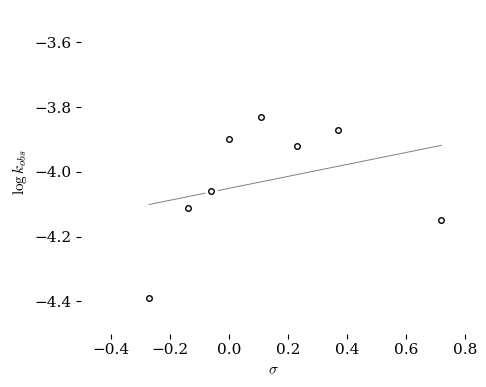

In [15]:
from scipy.stats import linregress

############################################
### Pick the x and y data for the plot   ###
############################################

x = df[sigmatype]
y = df["logk"]


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"

plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

############################
### Set labels and scale ###
############################

if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"


ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=x_label,
          xlim=[-.5, 0.8],                  
          ylim=[-4.5, -3.5]
      )
#########################################
### Plot the data and the line fit.   ###
#########################################

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", zorder=3)


if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    
    fitx = np.linspace(np.min(x), np.max(x), 100)
    fity = linfit.slope * fitx + linfit.intercept

    ax.plot(fitx, fity, color='grey', zorder=1, linewidth=0.7)

    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")
    print(f"p value = {(linfit.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit.intercept_stderr):0.6f}")
    

############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

fig.savefig("plot1.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


## Figure 2: Plotting the Residuals

You should always eyeball a plot of the resuduals for any line fit. It may appear to fit well but if we see a systematic variation (high on the ends, low in the middle or an s-curve, etc.) then we should suspect that our model is not capturing all the information.

The code below will create a residual plot that we can examine.

0.09685496485986023


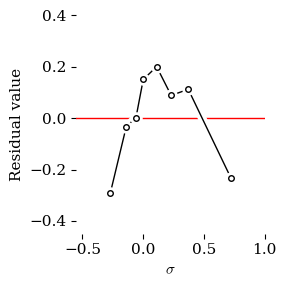

In [16]:
###########################################################
### Plot the residuals for product B vs. time in ax[1]  ###
###########################################################


model_y = fity = linfit.slope * x + linfit.intercept

### Calculate R^2 for First order fit
residuals = y - model_y
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"

plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

ax.set(ylabel=r"Residual value", 
       xlabel=x_label,
          xlim=[-.55, 1.0],                  
          ylim=[-0.45, 0.4]      
      )
ax.axhline(y = 0.0, color = 'r', linestyle = '-')

### Plot the residuals 
ax.plot(x, residuals, "w-", linewidth = 6)   # a white thick line to erase background
ax.plot(x, residuals, "k-")                  # the thin black line that connects the dots


ax.scatter(x,residuals, s=64, color="white", zorder=3)    # white border around each point
ax.scatter(x,residuals, s=16, color="white", edgecolor = "black", zorder=3)  # the points



fig.savefig("plot1r.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

## Figure 3: Two Hammett Plots 

slope1 = -0.5022
intercept1 = -3.763
RSQ_1 = 0.857994
p value = 0.073721
stderr for slope = 0.144462
stderr for intercept = 0.061303

slope1 = 1.4852
intercept1 = -3.951
RSQ_1 = 0.954504
p value = 0.004176
stderr for slope = 0.187214
stderr for intercept = 0.027540


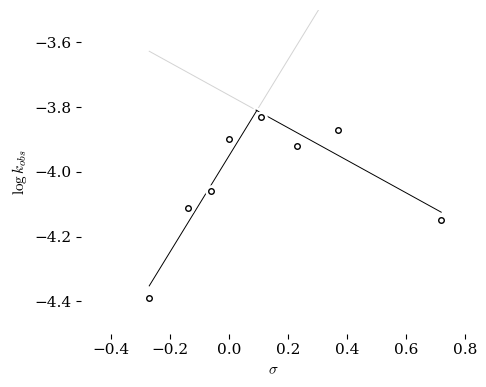

In [17]:
### This will pick the section of the plot with the HIGHER sigma values
top4x = x[0:5]     # Python numbers arrays from 0. This will slice of positions 0,1,2 and 3.
top4y = y[0:5]

### This will pick the section of the plot with the LOWER sigma values
bot3x = x[4:9]     # This will slice of positipns 4,5,6.
bot3y = y[4:9]

from scipy.stats import linregress

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


###################################################
### Plot the line fits across the full range.   ###
###################################################

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(bot3x,bot3y)
    
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='white', zorder=1, linewidth=3)
    ax.plot(x, fity, color='lightgrey', zorder=1, linewidth=0.7)

    linfit = linregress(top4x,top4y)

    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='white', zorder=1, linewidth=3)
    ax.plot(x, fity, color='lightgrey', zorder=1, linewidth=0.7)

#########################################
### Plot the data and the line fit.   ###
#########################################

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", zorder=3)

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit_bot = linregress(bot3x,bot3y)
    linfit_top = linregress(top4x,top4y)

    linerange_bot = np.array((np.min(bot3x)-0.018, np.max(bot3x)))
    linerange_top = np.array((np.min(top4x), np.max(top4x)-0.015))

    fity_bot = linfit_bot.slope * linerange_bot + linfit_bot.intercept
    fity_top = linfit_top.slope * linerange_top + linfit_top.intercept

    ax.plot(linerange_bot, fity_bot, color='white', zorder=1, linewidth=4)
    ax.plot(linerange_top, fity_top, color='white', zorder=1, linewidth=4)

    ax.plot(linerange_bot, fity_bot, color='black', zorder=1, linewidth=0.7)
    ax.plot(linerange_top, fity_top, color='black', zorder=1, linewidth=0.7)

    print(f"slope1 = {linfit_bot.slope:0.4f}")
    print(f"intercept1 = {linfit_bot.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit_bot.rvalue**2):0.6f}")
    print(f"p value = {(linfit_bot.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit_bot.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit_bot.intercept_stderr):0.6f}")

    print()
    
    print(f"slope1 = {linfit_top.slope:0.4f}")
    print(f"intercept1 = {linfit_top.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit_top.rvalue**2):0.6f}")
    print(f"p value = {(linfit_top.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit_top.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit_top.intercept_stderr):0.6f}")
   
############################
### Set labels and scale ###
############################

if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=x_label,
          xlim=[-.5, 0.8],                  
          ylim=[-4.5, -3.5]
      
      )

############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,-0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

fig.savefig("plot2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


## Figure 4: Adding the Hammett Plots Together

slope1 = -0.5022
intercept1 = -3.763
RSQ_1 = 0.857994
p value = 0.073721
stderr for slope = 0.144462
stderr for intercept = 0.061303

slope1 = 1.7203
intercept1 = -3.913
RSQ_1 = 0.966740
p value = 0.016771
stderr for slope = 0.225635
stderr for intercept = 0.034973
The R^2 value for curve is 0.0004
The R^2 value for curve is -17.3447


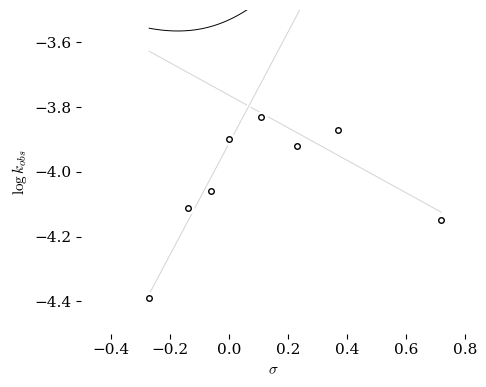

Substituent
p-OCH3   -3.556333
p-CH3    -3.563699
m-CH3    -3.550794
H        -3.530515
m-OCH3   -3.467395
p-Cl     -3.360356
m-Cl     -3.192723
m-NO2    -2.659203
Name: sigma, dtype: float64


In [18]:
### This will pick the section of the plot with the HIGHER sigma values
top4x = x[0:4]     # Python numbers arrays from 0. This will slice of positions 0,1,2 and 3.
top4y = y[0:4]

### This will pick the section of the plot with the LOWER sigma values
bot3x = x[4:9]     # This will slice of positipns 5,6 and 7.
bot3y = y[4:9]

from scipy.stats import linregress

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


###################################################
### Plot the line fits across the full range.   ###
###################################################

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(bot3x,bot3y)
    
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='white', zorder=1, linewidth=3)
    ax.plot(x, fity, color='lightgrey', zorder=1, linewidth=0.7)

    linfit = linregress(top4x,top4y)

    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='white', zorder=1, linewidth=3)
    ax.plot(x, fity, color='lightgrey', zorder=1, linewidth=0.7)

#########################################
### Plot the data and the line fit.   ###
#########################################

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", zorder=3)

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit_bot = linregress(bot3x,bot3y)
    linfit_top = linregress(top4x,top4y)

    print(f"slope1 = {linfit_bot.slope:0.4f}")
    print(f"intercept1 = {linfit_bot.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit_bot.rvalue**2):0.6f}")
    print(f"p value = {(linfit_bot.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit_bot.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit_bot.intercept_stderr):0.6f}")

    print()
    
    print(f"slope1 = {linfit_top.slope:0.4f}")
    print(f"intercept1 = {linfit_top.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit_top.rvalue**2):0.6f}")
    print(f"p value = {(linfit_top.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit_top.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit_top.intercept_stderr):0.6f}")


    ###############################################################################
    ### Sum the rate constants and take the log for the total rate calculation ####
    ###############################################################################


    k_bot_calc = 10 ** (linfit_bot.slope * x + linfit_bot.intercept)
    k_top_calc = 10 ** (linfit_top.slope * x + linfit_top.intercept)

    total_k = k_top_calc + k_bot_calc
    total_y = np.log10(total_k)

    xrange = np.linspace(np.min(x), np.max(x), 100)
    k_bot_calc = 10 ** (linfit_bot.slope * xrange + linfit_bot.intercept)
    k_top_calc = 10 ** (linfit_top.slope * xrange + linfit_top.intercept)
    total_k = k_top_calc + k_bot_calc
    total_y_curve = np.log10(total_k)


    ax.plot(xrange, total_y_curve, color='black', zorder=1, linewidth=0.7)   # Plot model line a smooth curve
#    ax.plot(x, total_y, color='black', zorder=1, linewidth=0.7)             # Plot model line using data points only

    from scipy.stats import pearsonr
    from sklearn.metrics import r2_score
    rsqsk = r2_score(y, total_y)
    rsq = pearsonr(y, total_y)
    print(f"The R^2 value for curve is {rsq.statistic**2:0.4f}")
    print(f"The R^2 value for curve is {rsqsk:0.4f}")



   
############################
### Set labels and scale ###
############################

if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=x_label,
          xlim=[-.5, 0.8],                  
          ylim=[-4.5, -3.5]
      
      )

############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,-0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

fig.savefig("plot3.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

print(total_y)

## Figure 5: Plotting Residuals for Figure 4 Plot

-17.344662729217493


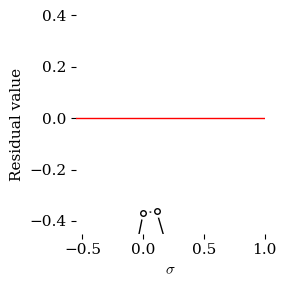

In [19]:
###########################################################
### Plot the residuals for log[toal k_obs] vs sigma+    ###
###########################################################


# y is experimental data
# total_y is the calculated results from the model of adding the two hammett plots together

### Calculate R^2 for First order fit
residuals = y - total_y
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"

plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

ax.set(ylabel=r"Residual value", 
       xlabel=x_label,
          xlim=[-.55, 1.0],                  
          ylim=[-0.45, 0.4]      
      )
ax.axhline(y = 0.0, color = 'r', linestyle = '-')

### Plot the residuals 
ax.plot(x, residuals, "w-", linewidth = 6)   # a white thick line to erase background
ax.plot(x, residuals, "k-")                  # the thin black line that connects the dots


ax.scatter(x,residuals, s=64, color="white", zorder=3)    # white border around each point
ax.scatter(x,residuals, s=16, color="white", edgecolor = "black", zorder=3)  # the points



fig.savefig("plot3r.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

## Figure 6: Fitting the Addition Model Directly to the Data

In the block of code below we create a function that defines the model of adding the two Hammett plots together and then fit this model to the data. That's it, that's all you have to do. The next code block creates the plot but all the math was done in the little block below.

In [20]:
from scipy.optimize import curve_fit

def addingHammett(x, rho1, int1, rho2, int2):
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)

popt, pcov = curve_fit(addingHammett, x, y)
popt, pcov

(array([ 0.18437729, -4.91220625,  0.18438884, -4.11525786]),
 array([[ 9.44915217e+08,  8.52379077e+10, -1.53727287e+08,
         -1.36043790e+10],
        [ 8.52379077e+10,  5.91170157e+14, -3.37171859e+10,
         -9.43535828e+13],
        [-1.53727287e+08, -3.37171859e+10,  2.56850252e+07,
          5.38142427e+09],
        [-1.36043790e+10, -9.43535828e+13,  5.38142427e+09,
          1.50592828e+13]]))

slope1 = 0.1844
intercept1 = -4.912
slope1 STDEV = 944915217.022177
intercept1 STDEV = 591170156523533.750000

slope2 = 0.1844
intercept2 = -4.115
slope2 STDEV = 25685025.218653
intercept2 STDEV = 15059282815836.408203
The R^2 value for curve is 0.0969
The R^2 value for curve is 0.0969


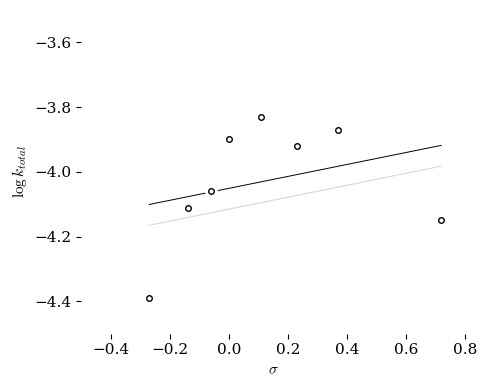

In [21]:
xrange = np.linspace(np.min(x), np.max(x), 100)

from scipy.stats import linregress

rho1 = popt[0]
c1 = popt[1]
rho2 = popt[2]
c2 = popt[3]

rho1_err = pcov[0,0]
c1_err = pcov[1,1]
rho2_err = pcov[2,2]
c2_err = pcov[3,3]

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################


style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", zorder=3)


if True:   # Flag to run or not. True = run this section, False = skip it
    print(f"slope1 = {rho1:0.4f}")
    print(f"intercept1 = {c1:0.3f}")
    print(f"slope1 STDEV = {(rho1_err):0.6f}")
    print(f"intercept1 STDEV = {(c1_err):0.6f}")
    print()
    
    print(f"slope2 = {rho2:0.4f}")
    print(f"intercept2 = {c2:0.3f}")
    print(f"slope2 STDEV = {(rho2_err):0.6f}")
    print(f"intercept2 STDEV = {(c2_err):0.6f}")

#    ysum = np.log10(10**ytop+10**ybot)
    ax.plot(xrange, rho1*xrange + c1, color='lightgrey', zorder=1, linewidth=0.7)

    ax.plot(xrange, rho2*xrange + c2, color='white', zorder=1, linewidth=4)
    ax.plot(xrange, rho2*xrange + c2, color='lightgrey', zorder=1, linewidth=0.7)

    ax.plot(xrange, addingHammett(xrange, *popt), color='black', zorder=1, linewidth=0.7)

    from scipy.stats import pearsonr
    from sklearn.metrics import r2_score
    rsqsk = r2_score(y, addingHammett(x, *popt))
    rsq = pearsonr(y, addingHammett(x, *popt))
    print(f"The R^2 value for curve is {rsq.statistic**2:0.4f}")
    print(f"The R^2 value for curve is {rsqsk:0.4f}")

############################
### Set labels and scale ###
############################

if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

ax.set(ylabel=r"$\log{k_{total}}$", 
       xlabel=x_label,
          xlim=[-.5, 0.8],                  
          ylim=[-4.5, -3.5]
      
      )

ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,-0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

fig.savefig("plot4.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots




## Figure 7: Plotting the Residuals for the Addition Model

0.09685496430203722


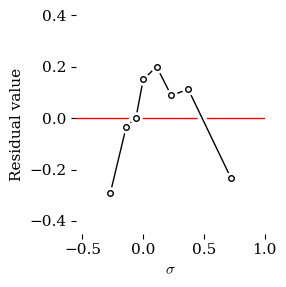

In [22]:
###########################################################
### Plot the residuals for log[toal k_obs] vs sigma+    ###
###########################################################


# y is experimental data
# total_y is the calculated results from the model of adding the two hammett plots together

total_y = addingHammett(x, *popt)

### Calculate R^2 for First order fit
residuals = y - total_y
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"

plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

ax.set(ylabel=r"Residual value", 
       xlabel=x_label,
          xlim=[-.55, 1.0],                  
          ylim=[-0.45, 0.4]      
      )
ax.axhline(y = 0.0, color = 'r', linestyle = '-')

### Plot the residuals 
ax.plot(x, residuals, "w-", linewidth = 6)   # a white thick line to erase background
ax.plot(x, residuals, "k-")                  # the thin black line that connects the dots


ax.scatter(x,residuals, s=64, color="white", zorder=3)    # white border around each point
ax.scatter(x,residuals, s=16, color="white", edgecolor = "black", zorder=3)  # the points



fig.savefig("plot4r.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots